In [1]:
print("Hello")

Hello


/home/mayank/.local/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/mayank/.local/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


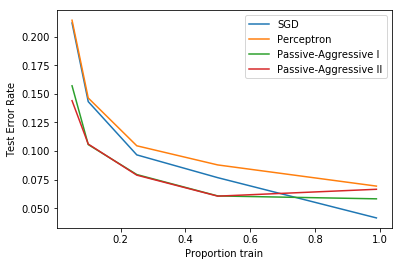

In [2]:
"""
==================================
Comparing various online solvers
==================================
  
An example showing how different online solvers perform
on the hand-written digits dataset.
  
"""
# Author: Rob Zinkov <rob at zinkov dot com>
# Updated by Mayank Johri [mayank at gmail dot  .com.]
# License: BSD 3 clause
  
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
  
heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
digits = datasets.load_digits()
  
classifiers = [
    ("SGD", SGDClassifier( tol = 0.1 )),
    ("Perceptron", Perceptron()),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0 )),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0 )),
]
  
xx = 1 - np.array(heldout)
for name, clf in classifiers:
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                                digits.target,
                                                                test_size=i)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    pl.plot(xx, yy, label=name)
  
pl.legend(loc="upper right")
pl.xlabel("Proportion train")
pl.ylabel("Test Error Rate")
pl.show()
  

In [ ]:
"""
==================================
Comparing various online solvers
==================================
  
An example showing how different online solvers perform
on the hand-written digits dataset.
  
"""
# Author: Rob Zinkov <rob at zinkov dot com>
# Updated by Mayank Johri [mayank at gmail dot  .com.]
# License: BSD 3 clause
  
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
  
heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
digits = datasets.load_digits()
  
classifiers = [
    ("SGD", SGDClassifier(max_iter=3)),
    ("Perceptron", Perceptron(max_iter=1000)),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0, max_iter=1000 )),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0, max_iter=1000)),
]
  
xx = 1 - np.array(heldout)
for name, clf in classifiers:
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                                digits.target,
                                                                test_size=i)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    pl.plot(xx, yy, label=name)
  
pl.legend(loc="upper right")
pl.xlabel("Proportion train")
pl.ylabel("Test Error Rate")
pl.show()